In [39]:
import pandas as pd
import numpy as np 
import argparse, textwrap
from typing import Dict, List, Optional
from PIL import Image, ImageOps, ImageDraw, ImageFont
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None)  # or 1000
pd.set_option('display.max_rows', 170)

In [2]:
#Defining project root
import sys
from pathlib import Path
# Make sure we can import config.py from project root
project_root = Path('..').resolve() 
# Add subdirectories to path
sys.path.insert(0, str(project_root))
sys.path.insert(0, str(project_root / 'config'))
import config

In [ ]:
#Processed data directory
processed_pilot = config.PROCESSED_DIR / '08092025_pilot'
df = pd.read_csv(processed_pilot / 'participants_log_cleaned_pilot_08092025.csv')


In [58]:
df.columns

Index(['uid', 'gt', 'session', 'attempt', 'img_index', 'request_seed',
       'returned_seed', 'prompt', 'negative_prompt', 'gen', 'subjective_score',
       'prompt_latency_secs', 'model_latency_secs', 'rating_latency_secs',
       'generated_at_utc', 'ts'],
      dtype='object')

In [52]:
df.head(3)

,uid,gt,session,attempt,img_index,request_seed,returned_seed,prompt,negative_prompt,gen,subjective_score,prompt_latency_secs,model_latency_secs,rating_latency_secs,generated_at_utc,ts
0,00aeccd632c742d48a9ffe94da201493,farm_h.jpg,1,1,1,481678699,481678699,Hall,NaN,00aeccd632c742d48a9ffe94da201493_session01_attempt01_img01_seed481678699.png,13,10.799,11.655,13.221,2025-09-08T11:16:23.064779+00:00,1757330197
1,00aeccd632c742d48a9ffe94da201493,farm_h.jpg,1,2,1,481678699,481678699,Public meeting hall,NaN,00aeccd632c742d48a9ffe94da201493_session01_attempt02_img01_seed481678699.png,64,11.360,12.852,14.576,2025-09-08T11:17:03.773220+00:00,1757330240
2,00aeccd632c742d48a9ffe94da201493,farm_h.jpg,1,3,1,481678699,481678699,Public bathroom,NaN,00aeccd632c742d48a9ffe94da201493_session01_attempt03_img01_seed481678699.png,88,13.336,12.056,19.006,2025-09-08T11:17:49.615692+00:00,1757330290


In [59]:
order = ['uid', 'gt', 'session', 'attempt', 'img_index', 'request_seed',
       'returned_seed', 'prompt', 'negative_prompt', 'gen', 'subjective_score',
       'prompt_latency_secs', 'model_latency_secs', 'rating_latency_secs',
       'generated_at_utc', 'ts']

In [73]:
#removing duplicates - these happened because of multiple presses on similarity scale before clicking "Done" or "Another try" - keeping only the last ones as they have the highest timestamp
#They are grouped by identifies - same prompt and prompt latency 
df_clean = (
    df.sort_values('ts')
    .drop_duplicates(subset=['uid', 'gt', 'session', 'attempt', 'prompt', 'prompt_latency_secs'], keep='last') # ascending → largest is "last"
    .sort_index(kind='mergesort') # returning original index
)
df_clean.to_csv(config.PROCESSED_DIR / 'participants_log_cleaned_pilot_09092025.csv', index=False)


In [64]:
df_duplicated = df[df.duplicated(subset=['uid', 'gt', 'session', 'attempt', 'prompt', 'prompt_latency_secs'], keep=False)]
len(df_duplicated)

35

# Exploration

In [20]:
sample_df = df[['uid', 'session', 'attempt', 'gt', 'prompt', 'negative_prompt', 'subjective_score']]
sample_df.sort_values('subjective_score', ascending=False).head(30)

,uid,session,attempt,gt,prompt,negative_prompt,subjective_score
164,cdf5319ea9f74b748878c6e60a70aa02,8,1,farm_h.jpg,white buildings with red slanted roofs. One main building with multiple others in the background. Green grass and a few pines in the background.,NaN,97
146,cdf5319ea9f74b748878c6e60a70aa02,2,1,bedroom_h.jpg,View of a messy full size mattress lifted by a wooden bed frame. The bed is covered by a red sheet and 2 red pillows. The bed is not made and it has some clothes on it. The bed is in the corner of the room and there is a small corner of a window in the upper left corner.,NaN,93
165,cdf5319ea9f74b748878c6e60a70aa02,8,2,farm_h.jpg,white buildings with red slanted roofs. One main building with multiple others in the background. Green grass and a few pines in the background. Separate the buildings and add white clouds.,NaN,93
16,00aeccd632c742d48a9ffe94da201493,6,3,conference_room_l.jpg,dining table,NaN,91
61,42e77f8b2a8b40a7861ea3f00968a969,5,3,bedroom_h.jpg,"An unmade bed. Cream fitted sheets. A red duvet. Red pillow cases. Clothes on the bed. Dark brown carpet. Cream colored walls. One window, with white 'jail bars'. The picture feels very unsettling. There is a few clothing items under the bed. It looks very unkempt.","nightstand, headboard",89
2,00aeccd632c742d48a9ffe94da201493,1,3,farm_h.jpg,Public bathroom,NaN,88
3,00aeccd632c742d48a9ffe94da201493,2,1,fountain_l.jpg,water fountain,NaN,87
10,00aeccd632c742d48a9ffe94da201493,4,3,kitchen_l.jpg,Kitchen with window,NaN,86
100,8aac8cc7d3eb41dd9cdf86ba8c12e3dd,2,3,farm_h.jpg,a group of small white houses with red roofs on a freshly mowed lawn and cloudy sky. houses are arranged with two next to each other and another in the distance,NaN,85
7,00aeccd632c742d48a9ffe94da201493,3,2,garden_h.jpg,flower garden,NaN,83


In [27]:
sample_final_attempts = sample_df[sample_df['attempt'] == 3]
sample_final_attempts.sort_values('gt', ascending=False).head(15)

,uid,session,attempt,gt,prompt,negative_prompt,subjective_score
31,326a1bf014544f76a4185dc889361d58,3,3,kitchen_l.jpg,"Bright kitchen. White walls, modern design. flowers in an old kettle next to the double window in the center back of the image. You can see a coffee maker on the wood counter, above some cupboards. There are also cupboards above it. There is a white door in the back right and a small stovetop in the front left. The windows are double windows with simple design. There is a door in the image. The windows are single frame.","Those windows are too elaborate, they are actually much simpler.",68
10,00aeccd632c742d48a9ffe94da201493,4,3,kitchen_l.jpg,Kitchen with window,NaN,86
58,42e77f8b2a8b40a7861ea3f00968a969,4,3,kitchen_l.jpg,"From a corner view. A small kitchen, with white cabinets and oak countertops. The cabinets have oak wood hardware. One window with a vase of small pink flowers on the windowsill. The floor is a cream color, with black checkered stripes. There is a coffeepot on the counter. The walls are white.","range hood, sink",48
145,cdf5319ea9f74b748878c6e60a70aa02,1,3,kitchen_l.jpg,"A small kitchen view. Cream tile floors, white small stove, small black coffee maker, brown counter tops and white wall cabinets. A small vase of flowers sits on the window ledge straight ahead with a white door cracked to the right. Center the window.",NaN,76
136,b1ec39169e694a07887cc653e9ecd2b8,6,3,kitchen_l.jpg,the kitchen is tiny the counters are across from each other the right counter has a wood top and a coffee pot on it. the left side id a tiny parrt of a stove the front two burners and knobs are visible with the countertop next to it its only a tiny bit that you can see of the left counter next to stove there is a wall to the right of the counters mostly a large verticle window divided and a very large sill someone could sit on but it has a vase of flowers the floor is barely visible its tan with squares,NaN,0
103,8aac8cc7d3eb41dd9cdf86ba8c12e3dd,3,3,kitchen_l.jpg,a tiny white kitchen. there is a small counter with brown top and a oven that is barely visible from the bottom left side. The door is slightly open that leads outside and also white. there is a little nook in front of a window that has a pitcher of flowers. old fashioned tile floor,NaN,80
76,6d3f4debdb254a30a2964dc9cad815df,2,3,kitchen_l.jpg,An image of a kitchen with a big window and a flower vase along the window pane. I can also see kitchen cabinets and a cofee maker on it and also an image of a cooker. The kitchen also has a wall hanging near the window remove the kitchen sink the image only shows a small sector of the kitchen,NaN,52
130,b1ec39169e694a07887cc653e9ecd2b8,4,3,garden_h.jpg,a courtyard on a grey fall day drab the corner wall of a brick building shows on the left a gap with woods in view then on the right a lager wall of another brick building with two vertical windows with 3x8 tiny square panes in front of that you have the court yard with a cone shape spiral cut bush with oddly shaped flower beds around it,NaN,0
106,8aac8cc7d3eb41dd9cdf86ba8c12e3dd,4,3,garden_h.jpg,a garden with a few seperate groups of flowers. there is a large green topiary that almost looks like a christmas tree. it's in the middle of a courtyard. in the top of the photo there are branches hanging down. realistic and not cartoony,NaN,55
40,326a1bf014544f76a4185dc889361d58,6,3,garden_h.jpg,"Looks like a nice little winding walking path with some reddish pink flowers bordering the walk ways. The flower patches are bordered on all sides by stone wall made up of small pebbles. There is a building in the back, suggesting this may be a courtyard. There is also some sort of pine tree that is heavily trimmed to look as if it is a spiral. All the flower beds have the stone border I described. A single pine tree is present that is cut to look like there is a spiral. Walking path weaves in and out in a small area, not a straight path.",NaN,40


In [36]:
df['gt'].unique()

array(['farm_h.jpg', 'fountain_l.jpg', 'garden_h.jpg', 'kitchen_l.jpg',
       'dam_l.jpg', 'conference_room_l.jpg', 'badlands_h.jpg',
       'bedroom_h.jpg'], dtype=object)

# VISUALIZE all images per particpant

In [41]:
def build_uid_image_index(uid: str) -> Dict[str, Path]:
    """Map generated image filename -> full path (search only this uid's folder)."""
    root = Path(config.PARTICIPANTS_DIR) / uid
    index = {}
    if root.exists():
        for p in root.rglob("*"):
            if p.is_file() and p.suffix.lower() in IMG_EXTS:
                index[p.name] = p
    return index
IMG_EXTS = {".png", ".jpg", ".jpeg", ".webp"}
image_bank = build_uid_image_index('00aeccd632c742d48a9ffe94da201493')

adding columns to the dataframe - prompt length first

In [42]:
image_bank.keys()

dict_keys(['00aeccd632c742d48a9ffe94da201493_session07_attempt02_img01.png', '00aeccd632c742d48a9ffe94da201493_session07_attempt03_img01.png', '00aeccd632c742d48a9ffe94da201493_session07_attempt01_img01.png', '00aeccd632c742d48a9ffe94da201493_session06_attempt02_img01.png', '00aeccd632c742d48a9ffe94da201493_session06_attempt01_img01.png', '00aeccd632c742d48a9ffe94da201493_session06_attempt03_img01.png', '00aeccd632c742d48a9ffe94da201493_session03_attempt03_img01.png', '00aeccd632c742d48a9ffe94da201493_session03_attempt01_img01.png', '00aeccd632c742d48a9ffe94da201493_session03_attempt02_img01.png', '00aeccd632c742d48a9ffe94da201493_session05_attempt02_img01.png', '00aeccd632c742d48a9ffe94da201493_session05_attempt01_img01.png', '00aeccd632c742d48a9ffe94da201493_session05_attempt03_img01.png', '00aeccd632c742d48a9ffe94da201493_session01_attempt03_img01.png', '00aeccd632c742d48a9ffe94da201493_session01_attempt01_img01.png', '00aeccd632c742d48a9ffe94da201493_session01_attempt02_img01.png',

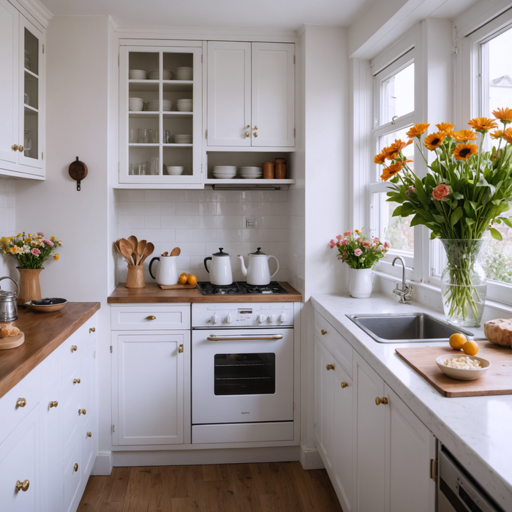

In [45]:
image_path = '/mnt/hdd/anatkorol/Imagination_in_translation/Data/participants_data/8aac8cc7d3eb41dd9cdf86ba8c12e3dd/gen_images/session_03/8aac8cc7d3eb41dd9cdf86ba8c12e3dd_session03_attempt01_img01.png'
i= Image.open(image_path)
i

,uid,gt,session,attempt,img_index,request_seed,returned_seed,prompt,negative_prompt,gen,subjective_score,prompt_latency_secs,model_latency_secs,rating_latency_secs,generated_at_utc,ts
0,00aeccd632c742d48a9ffe94da201493,farm_h.jpg,1,1,1,481678699,481678699,Hall,NaN,00aeccd632c742d48a9ffe94da201493_session01_attempt01_img01_seed481678699.png,13,10.799,11.655,13.221,2025-09-08T11:16:23.064779+00:00,1757330197
1,00aeccd632c742d48a9ffe94da201493,farm_h.jpg,1,2,1,481678699,481678699,Public meeting hall,NaN,00aeccd632c742d48a9ffe94da201493_session01_attempt02_img01_seed481678699.png,64,11.360,12.852,14.576,2025-09-08T11:17:03.773220+00:00,1757330240
